<a href="https://www.kaggle.com/code/irenashen1/capstone-bellabeat-case-study-r?scriptVersionId=115937625" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


# <span style="color:#007BA7"> Capstone: Bellabeat Case Study | R </span>

<center><img src="https://bellabeat.com/wp-content/uploads/2022/05/Bellabeat-Corporate-Devices-1536x758.jpg" width="600px"></center>
    
# <span style="color:#007BA7"> Table of Contents </span>

* [1. Company Background](#company_background)
* [2. Ask](#ask)
    * [2.1 The business task](#business_task)
    * [2.2 Key stakeholders](#key_stakeholder)
* [3. Prepare](#prepare)
    * [3.1 Loading packages](#loading)
    * [3.2 Exploring data structure](#exploring)
    * [3.3 Assigning names and import files](#assigning)
    * [3.4 Verifying data](#verifying)
* [4. Process](#process)
    * [4.1 Changing column names](#changing)
    * [4.2 Converting date and time format](#converting)
    * [4.3 Merging dataframes](#mergining)
* [5. Analyze and Share Phase](#analyze)
    * [5.1 Daily data summary](#daily)
    * [5.2 Correlations](#correlations)
    * [5.3 Activity level during the days of the week](#activity)
    * [5.4 Grouping users into four types](#grouping)
        * [5.4.1 Distribution](#days_used_smart_device)
        * [5.4.2 Activities of each type: steps, calories, distance, sleep](#activities_of_each)
    * [5.5 Usage of the tracker](#usage)
* [6. Act - Recommendations](#act)


<a id="company_background"></a>
# <span style="color:#007BA7"> 1. Company Background </span> 

Founded in 2013, [Bellabeat](https://bellabeat.com) is a high tech company developing wellness tracking device for women. By 2016, Bellabeat launched multiple products and expanded their business globally. The products became available on their own e-commerce channel, as well as online retailers. Bellabeat focuses on digital marketing extensively, including Google Search, video ads, and consumer engagement on social media platforms. 

Bellabeat has launched 5 products: 

-   [Bellabeat app](https://bellabeat.com/health/): The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. It helps users better understand their current habits and make healthy decisions. 

-   [Leaf](https://bellabeat.com/leaf-urban/): Bellabeat's classic wellness tracker can be worn as a bracelet, necklace, or clip. It connects to the Bellabeat app to track activity, sleep, and stress.

-   [Time](https://bellabeat.com/time/): This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. It connects to the Bellabeat app to provide you with insights into your daily wellness. 

-   [Spring](https://bellabeat.com/spring/): This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. It connects to the Bellabeat app to track your hydration levels.

-   [Bellabeat membership](https://bellabeat.com/coach/): Bellabeat also offers a subscription-based membership program for users. It gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.


# <span style="color:#007BA7"> 2. Ask </span>

### 2.1 The Business Task<a class="anchor" id="the_business_task"></a>

As a data analyst working on the marketing analyst team, I will analyze smart device data to gain insight into how consumers are using their smart devices, and focus on one of Bellabeat's products. By outlining the process of the analysis and the key findings, high-level recommendations for marketing strategies will be presented to the key stakeholders. In this case study, I will focus on Bellabeat App for recommendations.<br />

### 2.2 Key Stakeholders<a class="anchor" id="the_business_task"></a>

-   Urška Sršen: cofounder and Chief Creative Officer. 

-   Sando Mur: cofounder and a key member of the Bellabeat executive team. 

-   Bellabeat marketing analytics team.

# <span style="color:#007BA7"> 3. Prepare </span> <a class="anchor" id="prepare"></a>

18 CSV files are available from [FitBit Fitness Tracker Data](https://www.kaggle.com/arashnic/fitbit) (CC0: Public Domain, dataset made available through Mobius). This Kaggle data set contains personal fitness tracker from thirty Fitbit users consented to the submission of personal tracker data. 

We will use R as the tool because we can explore, process and visualize datasets in one platform, RStudio Cloud. SQL queries can also be used on data frames by running `sqldf()`. The files are uploaded into the RStudio Cloud work directory /cloud/project/BellaBeat/Fitabase.


### 3.1 Loading packages<a class="anchor" id="loading_packages"></a>

Here are the packages used in this case study:

In [1]:
library(tidyverse) #a must-have in R 
library(janitor) #for examining and cleaning dirty data
library(lubridate) #for date & time formats
library(sqldf) #for running SQL in R
library(ggpubr) #for creating and customizing ggplot2
library(waffle) #for the waffle charts
library(scales) #scaling used by ggplots
library(RColorBrewer) #for beautiful color palettes

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: gsubfn

Loading required package: proto

Warning message:
“no DISPLAY variable so Tk is not available”
Loading required package: RSQLite


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




### 3.2 Exploring data structure<a class="anchor" id="exploring"></a>

My approach for data profiling on RStudio is to browse data structure of all files by creating a file list, and read all 18 csv files' structure and variables, then decide which files to upload and use. Because it's the best to download the files directly from Input on Kaggle, I will share the working script in my RStudio as below:

- First, assign the folder's location and read all file names in the folder. In this case, `/cloud/project/Bellabeat/Fitabase` is my working path.  

`dp<-"/cloud/project/Bellabeat/Fitabase"   
setwd(dp)
files <- dir(dp,pattern = "*.csv")   
files` 

- Second,read all 18 csv files 

`df <- files %>%
  map(~ read_csv(file.path(dp, .))) 
df`

They all contain `Id` as the primary keys, and each file include multiple variables, such as `ActivityDate`, `Time`, `Distance`, `Steps`,`Intensities`, `Calories`, `Weight`, etc. As this case study aims to find trends, we will focus on data with dates and hours; minutes data will be secondary. 

We also observe some data limitations: 

  1. It is a small sample size (33 distinctive users based on data). After slicing and grouping, the size becomes even smaller and may not properly lead to meaningful results. 
  
  2. Demographic information, such as gender, age and health condition, is unavailable. As women is the target audience for Bellabeat, data specifically focused on women will be most ideal. 
  
  3. The data is dated in 2016. Due to major world event, such as the pandemic, lifestyle has changed significantly over the past years, therefore the trends observed here may not reflect users scenario nowadays. To gain more consumer insights, it will be the best to collect more up-to-date data.<br />

### 3.3 Assigning names and import files<a class="anchor" id="assigning"></a>

Since the datasets scope is defined, we will assign names and import them to data frames.

In [2]:
activity <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv") 
calories <- read_csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv") 
intensities <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
step <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
h_step <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
sleep <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read.csv(file= "../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

Rows: 940 Columns: 15

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 940 Columns: 3

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



### 3.4 Verifying data<a class="anchor" id="verifying"></a>

Baed on observation, data sets `dailyCalories`, `dailyIntensities`, and `dailySteps` could be subsets of `dailyActivities`. We will verify this with SQL queries by running `sqldf()`:

In [3]:
sqldf("SELECT COUNT()
      FROM activity 
      LEFT JOIN calories ON 
      activity.Id = calories.Id AND 
      activity.ActivityDate = calories.ActivityDay AND 
      activity.Calories = calories.Calories")

COUNT()
<int>
940


In [4]:
sqldf("SELECT COUNT()
      FROM activity 
      LEFT JOIN step  ON 
      activity.Id = step.Id AND 
      activity.ActivityDate = step.ActivityDay AND 
      activity.Totalsteps = step.StepTotal")

COUNT()
<int>
940


In [5]:
sqldf("SELECT COUNT()
      FROM activity 
      LEFT JOIN intensities  ON 
      activity.Id = intensities.Id AND 
      activity.ActivityDate = intensities.ActivityDay AND 
      activity.SedentaryMinutes = intensities.SedentaryMinutes AND
      activity.LightlyActiveMinutes = intensities.LightlyActiveMinutes AND
      activity.FairlyActiveMinutes = intensities.FairlyActiveMinutes AND
      activity.VeryActiveMinutes = intensities.VeryActiveMinutes AND
      activity.SedentaryActiveDistance = intensities.SedentaryActiveDistance AND
      activity.LightActiveDistance = intensities.LightActiveDistance AND
      activity.ModeratelyActiveDistance = intensities.ModeratelyActiveDistance AND
      activity.VeryActiveDistance = intensities.VeryActiveDistance")

COUNT()
<int>
940


As all 3 queries return 940, we verify that `dailyActivity` contains `dailyCalories`, `dailyIntensities` and `dailySteps`, we will remove them and use `dailyActivities` as one dataframe.

In [6]:
rm(calories,intensities,step)

In [7]:
n_distinct(activity$Id) 
n_distinct(h_step$Id) 
n_distinct(sleep$Id) 
n_distinct(weight$Id)

[1] 33

[1] 33

[1] 24

[1] 8

Due to the small sample size of weight data, it will be excluded from this study. Sample size of sleep data is rather small too, but we will keep it for reference.    
After reviewing the sample size, let's check and clean duplicates:

In [8]:
sum(duplicated(activity))
sum(duplicated(h_step))
sum(duplicated(sleep))

[1] 0

[1] 0

[1] 3

All files has 0 duplicate, except for sleep, where there are 3 duplicates.

In [9]:
sleep <- unique(sleep)
sum(duplicated(sleep))

[1] 0

Now the duplicates in `sleep` are removed.

# <span style="color:#007BA7"> 4. Process </span> <a class="anchor" id="process"></a>

First step in this phase is data cleaning. We notice the columns are in CamelCase naming convention. As R is case sensitive, we will first change all columns to lower case to make merging files easiers.

### 4.1 Changing column names<a class="anchor" id="changing"></a>

In [10]:
activity <- rename_with(activity, tolower)
sleep <- rename_with(sleep, tolower)
h_step <- rename_with(h_step, tolower)

head(activity)
head(sleep)
head(h_step)

id,activitydate,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,sleepday,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


,id,activityhour,steptotal
,<dbl>,<chr>,<int>
1,1503960366,4/12/2016 12:00:00 AM,373
2,1503960366,4/12/2016 1:00:00 AM,160
3,1503960366,4/12/2016 2:00:00 AM,151
4,1503960366,4/12/2016 3:00:00 AM,0
5,1503960366,4/12/2016 4:00:00 AM,0
6,1503960366,4/12/2016 5:00:00 AM,0


### 4.2 Converting date and time format<a class="anchor" id="converting"></a>

Here we will convert character format to date format. First, we make consistent date format in `activity` and `sleep`, as `sleep` will be merged into `activity`.

In [11]:
activity <- activity %>% 
  rename(date= activitydate) %>%
  mutate(date= as_date(date, format= "%m/%d/%Y"))
sleep <- sleep %>%
  rename(date= sleepday) %>%
  mutate(date= as_date(date, format= "%m/%d/%Y  %I:%M:%S %p", tz= Sys.timezone()))
head(activity)
head(sleep)

Warning message:
“`tz` argument is ignored by `as_date()`”


id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories
<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,id,date,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<int>,<int>,<int>
1,1503960366,2016-04-12,1,327,346
2,1503960366,2016-04-13,2,384,407
3,1503960366,2016-04-15,1,412,442
4,1503960366,2016-04-16,2,340,367
5,1503960366,2016-04-17,1,700,712
6,1503960366,2016-04-19,1,304,320


Second, convert $activityhour column in `h_step` data to date-time format.

In [12]:
h_step <- h_step %>% 
  rename(date_time= activityhour) %>% 
  mutate(date_time= as.POSIXct(date_time, format="%m/%d/%Y %I:%M:%S %p", tz= Sys.timezone()))

head(h_step)

,id,date_time,steptotal
,<dbl>,<dttm>,<int>
1,1503960366,2016-04-12 00:00:00,373
2,1503960366,2016-04-12 01:00:00,160
3,1503960366,2016-04-12 02:00:00,151
4,1503960366,2016-04-12 03:00:00,0
5,1503960366,2016-04-12 04:00:00,0
6,1503960366,2016-04-12 05:00:00,0


### 4. 3 Merging dataframes<a class="anchor" id="merging"></a>

Merge daily dataframes into `activity_sleep`. As `sleep` has fewer observations, add *all.x =TRUE* in the script to keep unmatched cases in `activity`.

In [13]:
activity_sleep <- merge(activity, sleep, by= c("id","date"), all.x = TRUE) 
head(activity_sleep)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712


# <span style="color:#007BA7"> 5. Analyze & Share </span> <a class="anchor" id="analyze_share"></a> 

### 5.1 Daily data summary<a class="anchor" id="daily"></a>

First, let's take a look at a summary for daily data:

In [14]:
activity_sleep %>% 
  select(totalsteps, calories,
         veryactiveminutes, fairlyactiveminutes, lightlyactiveminutes, sedentaryminutes,
         totalsleeprecords, totalminutesasleep, totaltimeinbed)%>%
  drop_na()%>%
  summary()

   totalsteps       calories    veryactiveminutes fairlyactiveminutes
 Min.   :   17   Min.   : 257   Min.   :  0.00    Min.   :  0.00     
 1st Qu.: 5189   1st Qu.:1841   1st Qu.:  0.00    1st Qu.:  0.00     
 Median : 8913   Median :2207   Median :  9.00    Median : 11.00     
 Mean   : 8515   Mean   :2389   Mean   : 25.05    Mean   : 17.92     
 3rd Qu.:11370   3rd Qu.:2920   3rd Qu.: 38.00    3rd Qu.: 26.75     
 Max.   :22770   Max.   :4900   Max.   :210.00    Max.   :143.00     
 lightlyactiveminutes sedentaryminutes totalsleeprecords totalminutesasleep
 Min.   :  2.0        Min.   :   0.0   Min.   :1.00      Min.   : 58.0     
 1st Qu.:158.0        1st Qu.: 631.2   1st Qu.:1.00      1st Qu.:361.0     
 Median :208.0        Median : 717.0   Median :1.00      Median :432.5     
 Mean   :216.5        Mean   : 712.1   Mean   :1.12      Mean   :419.2     
 3rd Qu.:263.0        3rd Qu.: 782.8   3rd Qu.:1.00      3rd Qu.:490.0     
 Max.   :518.0        Max.   :1265.0   Max.   :3.00   

Key findings: 

-   On average, each users takes 7,638 steps per day. This is lower than the daily 10,000 steps recommended by CDC. 
-   On average, each users spends 16.5 hours per day being seated or inactive. That's almost 70% of the day! 
-   The Mean is way higher than the median in *very active minutes* and *fairly active minutes*, indicating a non-normal distribution. This indicates there may be only a few users with much longer active minutes, while most users are with short active minutes. 
-   On average, each users sleeps 6.98 hours per day.

### 5.2 Correlations<a class="anchor" id="correlations"></a>

We want to find out if there are correlations between these variables:

-   Daily Steps vs Calories 
-   Daily Steps vs.Daily Sleep 

Let's make a plot for steps vs. calories:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



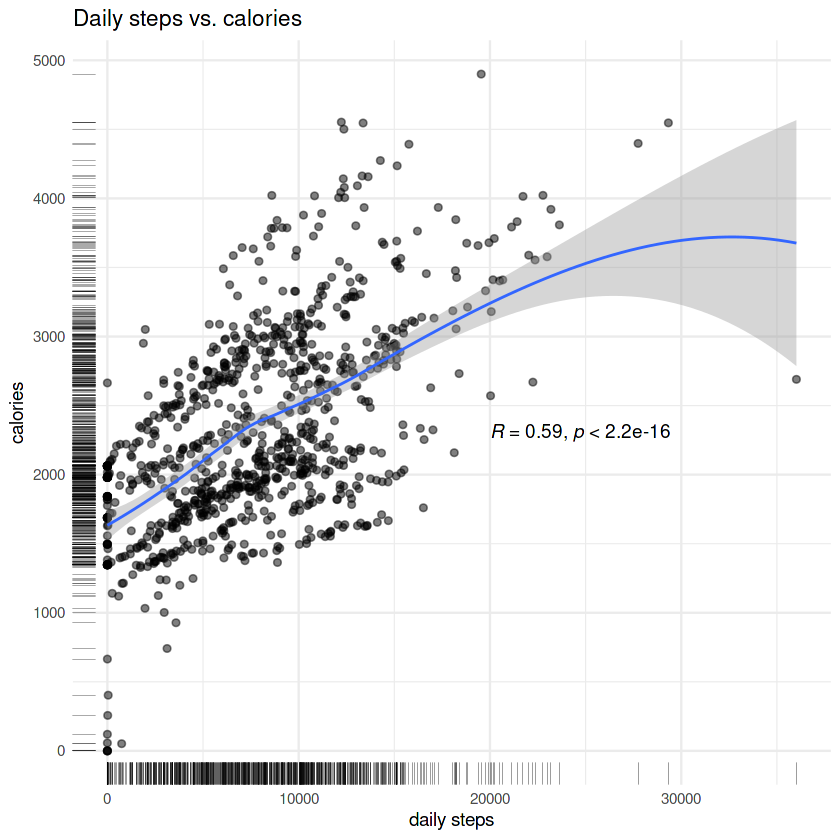

In [15]:
#steps vs. calories  
ggplot(activity_sleep,aes(totalsteps,calories))+geom_jitter(alpha=.5)+
    geom_rug(position="jitter", size=.08)+
    geom_smooth(size =.6)+
    stat_cor(method = "pearson", label.x = 20000, label.y = 2300)+
    labs(title= "Daily steps vs. calories", x= "daily steps", y="calories")+
    theme_minimal()

As one might expect, there's a correlation between daily steps and calories. The more steps taken, the more calories one may burn.  Here I used `stat_cor()` with Pearson method to run a quick correlation coefficient test, R= 0.59, indicating the two variables are somewhat correlated.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



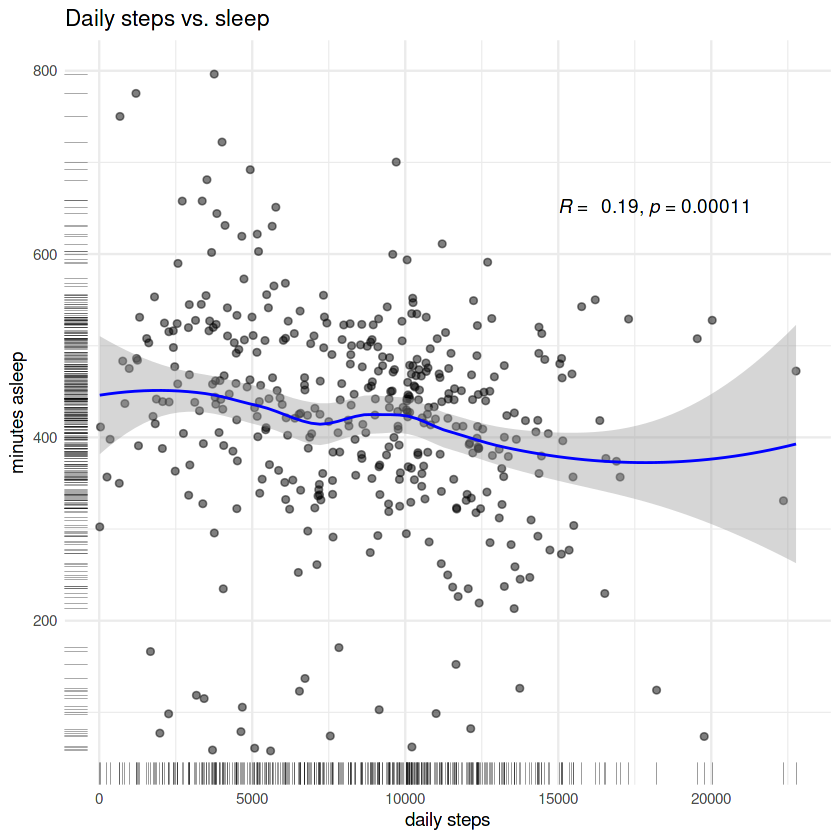

In [16]:
#steps vs. sleep  
ggplot(data= subset(activity_sleep,!is.na(totalminutesasleep)),aes(totalsteps,totalminutesasleep))+
    geom_rug(position= "jitter", size=.08)+
    geom_jitter(alpha= 0.5)+
    geom_smooth(color= "blue", size=.6)+
    stat_cor(method = "pearson", label.x = 15000, label.y = 650)+
    labs(title= "Daily steps vs. sleep", x= "daily steps", y= "minutes asleep")+
    theme_minimal()

R= 0.19, indicating little to no correlation between steps and amount of minutes users sleep per day. 

### 5.3 Activity level during the days of the week<a class="anchor" id="activity_level"></a>

We want to find out when users are the most active. First, separate date and time in `h_step` dataframe:

In [17]:
h_step <- h_step %>% 
  separate(date_time, into= c("date", "time"), sep = " ") %>% 
  mutate(date= ymd (date))

head(h_step)

,id,date,time,steptotal
,<dbl>,<date>,<chr>,<int>
1,1503960366,2016-04-12,00:00:00,373
2,1503960366,2016-04-12,01:00:00,160
3,1503960366,2016-04-12,02:00:00,151
4,1503960366,2016-04-12,03:00:00,0
5,1503960366,2016-04-12,04:00:00,0
6,1503960366,2016-04-12,05:00:00,0


Add $weekday as a new column:

In [18]:
h_step_weekday <- (h_step)%>%
  mutate(weekday= weekdays(date))%>%
  group_by (weekday,time) %>% 
  summarize(average_steps= mean(steptotal), .groups = 'drop')

h_step_weekday$weekday <- ordered(h_step_weekday$weekday, 
                                 levels=c("Monday", "Tuesday", "Wednesday","Thursday","Friday", "Saturday", "Sunday"))
                                 
head(h_step_weekday)

weekday,time,average_steps
<ord>,<chr>,<dbl>
Friday,00:00:00,44.27778
Friday,01:00:00,19.00794
Friday,02:00:00,16.27778
Friday,03:00:00,10.80159
Friday,04:00:00,14.43651
Friday,05:00:00,61.23016


A heat map will show users' activity level at one glance.

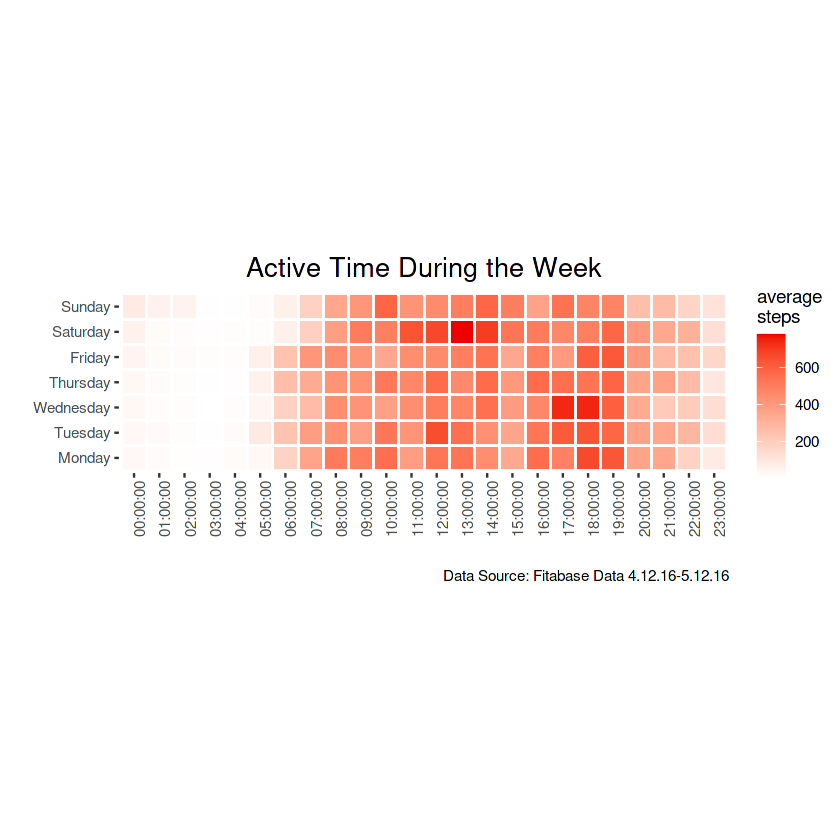

In [19]:
ggplot(h_step_weekday, aes(x= time, y= weekday, 
                           fill= average_steps)) +
  theme(axis.text.x= element_text(angle = 90))+
  labs(title= "Active Time During the Week", 
       x=" ", y=" ",fill = "average\nsteps",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_gradient(low= "white", high="red2")+
  geom_tile(color= "white",lwd =.6,linetype =1)+
  coord_fixed()+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        panel.background= element_blank())

Observation: Users start their day later on weekends, and are most active during 11am-1pm on Saturday, and 5-6pm on Wednesday. 

### 5.4 Grouping users into four types<a class="anchor" id="grouping"></a>

Based on daily activity level, we further group users into 4 types: *Sedentary*, *Lightly Active*, *Fairly Active*, and *Very Active*. The categorization is based on [this article](https://www.10000steps.org.au/articles/counting-steps/).

### 5.4.1 The distribution<a class="anchor" id="distribution"></a>

In [20]:
daily_average <- activity_sleep %>% 
  group_by (id) %>% 
  summarise(avg_daily_steps= mean(totalsteps), 
            avg_daily_cal= mean(calories), 
            avg_daily_sleep= mean(totalminutesasleep, 
                                   na.rm = TRUE)) %>% 
  mutate(user_type= case_when(
    avg_daily_steps < 5000 ~ "sedentary",
    avg_daily_steps >= 5000 & avg_daily_steps <7499 ~"lightly active",
    avg_daily_steps >= 7499 & avg_daily_steps <9999 ~"fairly active",
    avg_daily_steps >= 10000 ~"very active"
  ))

head(daily_average)

id,avg_daily_steps,avg_daily_cal,avg_daily_sleep,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12116.742,1816.419,360.28,very active
1624580081,5743.903,1483.355,NaN,lightly active
1644430081,7282.967,2811.300,294.00,lightly active
1844505072,2580.065,1573.484,652.00,sedentary
1927972279,916.129,2172.806,417.00,sedentary
2022484408,11370.645,2509.968,NaN,very active


Turing sums into percentage:

In [21]:
user_type_sum <- daily_average %>%
  group_by(user_type) %>%
  summarise(total= n()) %>%
  mutate(total_percent= scales::percent (total/sum(total)))

user_type_sum

user_type,total,total_percent
<chr>,<int>,<chr>
fairly active,9,27.3%
lightly active,9,27.3%
sedentary,8,24.2%
very active,7,21.2%


As users are fairly distributed among 4 types, despite the sample size is small, this dataset is somewhat unbiased in terms of activity level.

### 5.4.2 Activities of each type: steps, calories, distance & sleep<a class="anchor" id="activities_of_each"></a>

We want to looking to different variables vs each type: 

-   Types vs. Steps 
-   Types vs. Calories 
-   Types vs. Distance 
-   Types vs. Sleep 

To visualize data, we will need to add and reorder `$user_type` into the `activity_sleep_final` dataframe:

In [22]:
activity_sleep_final <- merge(activity_sleep, daily_average[c("id","user_type")], by="id") 

activity_sleep_final$user_type <-ordered(activity_sleep_final$user_type, levels= c("sedentary","lightly active","fairly active","very active")) 

head(activity_sleep_final)

,id,date,totalsteps,totaldistance,trackerdistance,loggedactivitiesdistance,veryactivedistance,moderatelyactivedistance,lightactivedistance,sedentaryactivedistance,veryactiveminutes,fairlyactiveminutes,lightlyactiveminutes,sedentaryminutes,calories,totalsleeprecords,totalminutesasleep,totaltimeinbed,user_type
,<dbl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<ord>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985,1,327,346,very active
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797,2,384,407,very active
3,1503960366,2016-04-14,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776,NA,NA,NA,very active
4,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745,1,412,442,very active
5,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863,2,340,367,very active
6,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728,1,700,712,very active


**Steps vs Types**

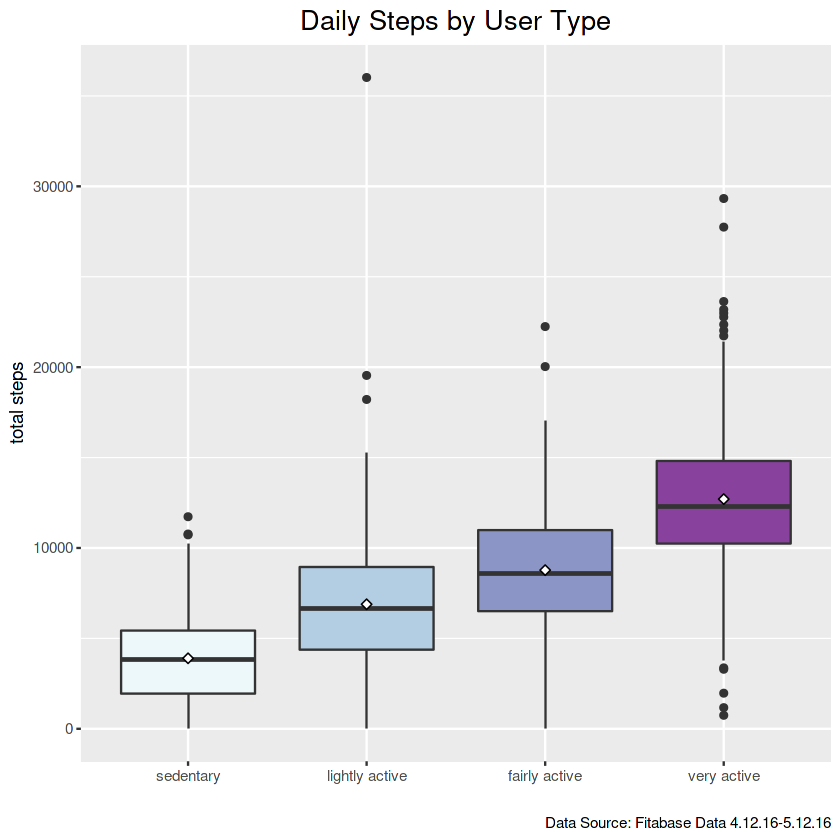

In [23]:
ggplot(activity_sleep_final[which(activity_sleep_final$totalsteps>0),], 
       aes(user_type,totalsteps, fill=user_type))+
  geom_boxplot()+
  stat_summary(fun="mean", geom="point", 
               shape=23,size=2, fill="white")+
  labs(title= "Daily Steps by User Type", 
       x= " ", y="total steps",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette="BuPu")+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        legend.position= "none")

-   As shown in the box plot above, *very active* users take more than 10,000 steps per day, with outliers widely up to 30,000, meaning the daily activity level of this type vary significantly.

**Calories vs Types**

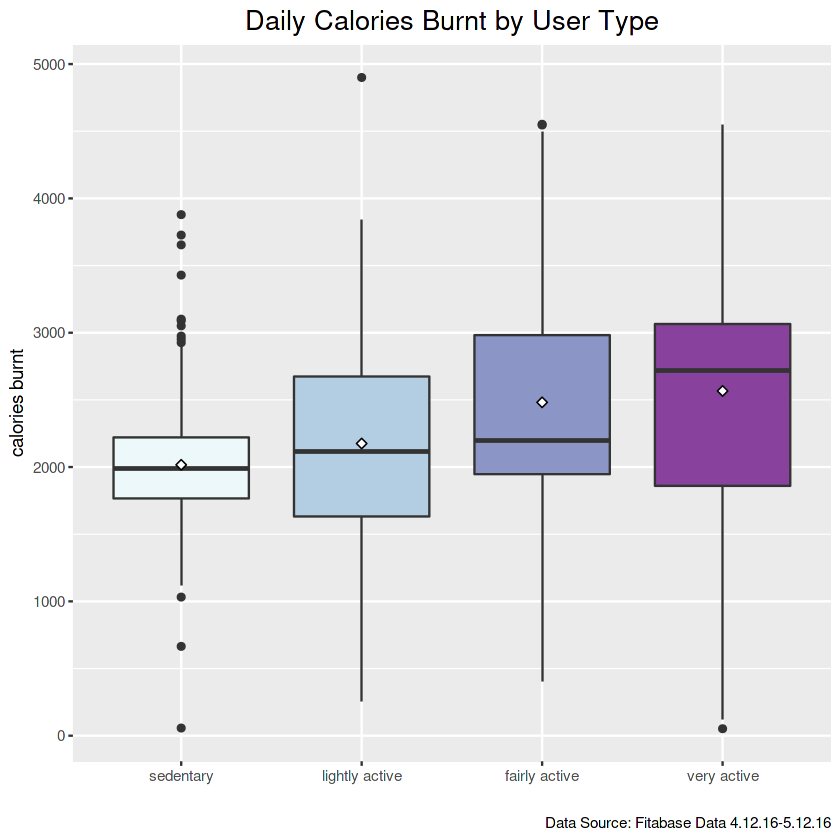

In [24]:
ggplot(activity_sleep_final[which(activity_sleep_final$calories>0),], aes(user_type,calories, fill=user_type))+
  geom_boxplot()+
  stat_summary(fun= "mean", geom= "point", 
               shape= 23,size= 2, fill= "white")+
  labs(title= "Daily Calories Burnt by User Type", 
       x= " ", y="calories burnt",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette="BuPu")+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        legend.position= "none")

-   Average calories burnt by types are in line with their daily activity level. 
-   *Lightly active* has only one outlier, and a mean very close to median, indicating during the time frame, they have the most consistent calories burnt trend.

**Distance vs. Types**

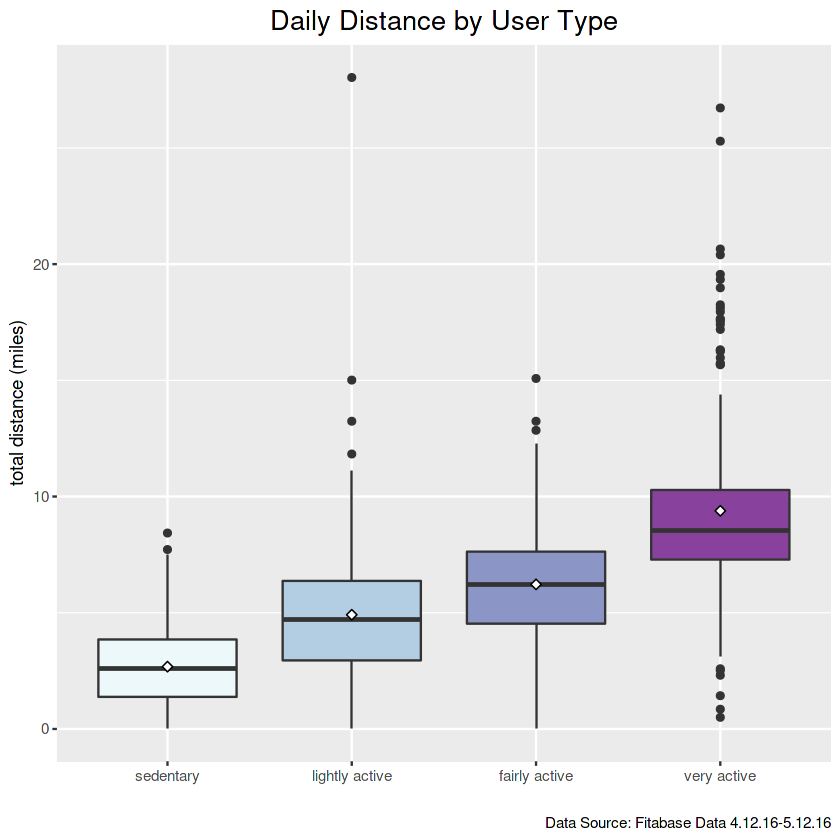

In [25]:
ggplot(activity_sleep_final[which(activity_sleep_final$totaldistance>0),], 
       aes(user_type,totaldistance, fill= user_type))+
  geom_boxplot()+
  stat_summary(fun= "mean", geom= "point", 
               shape= 23,size= 2, fill= "white")+
  labs(title= "Daily Distance by User Type", 
       x= " ", y = "total distance (miles)",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette= "BuPu")+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        legend.position = "none")

-   The average distance is in line with each type's daily steps, the more step one takes, the longer distance one walks. 
-   The *very active* type has the most outliers, meaning their activity pattern is inconsistent.

**Sleep vs Types**

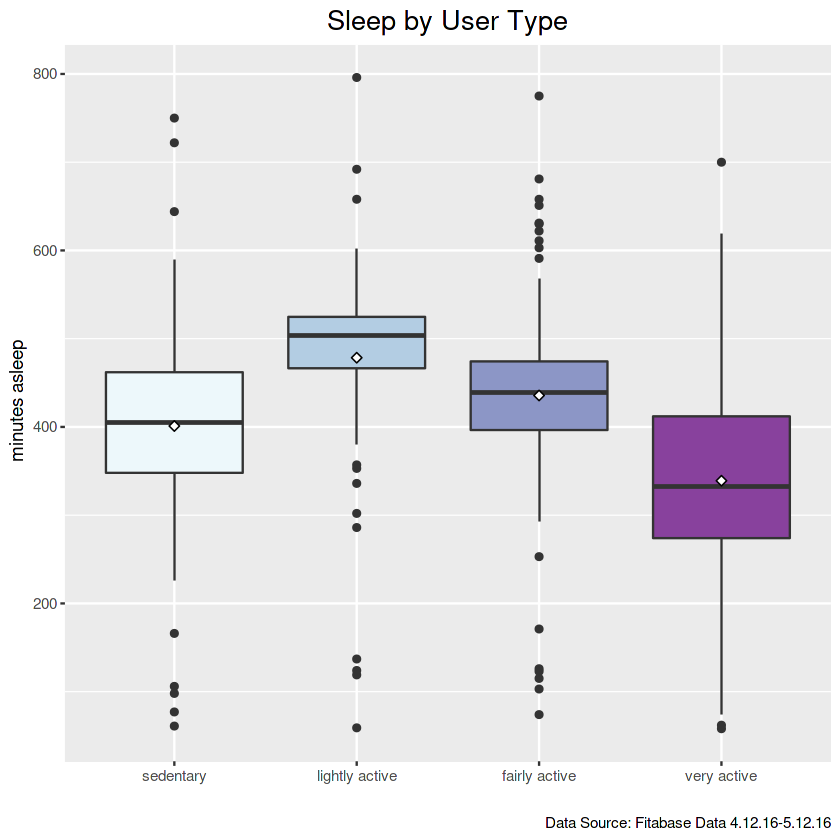

In [26]:
ggplot(subset(activity_sleep_final,!is.na(totalminutesasleep)),
       aes(user_type,totalminutesasleep, fill=user_type))+
  geom_boxplot()+
  stat_summary(fun="mean", geom="point", 
               shape=23,size=2, fill="white")+
  labs(title= "Sleep by User Type", 
       x= " ", y=" minutes asleep", 
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette="BuPu")+
  theme(plot.title= element_text(hjust= 0.5,vjust= 0.8, size=16),
        legend.position= "none")

-   There are a lot of outliers in the data, meaning the amount of sleep for each type varies significantly. 
-   The *lightly active* type has the longest sleep, while the *very active* type has the least amount of sleep.

### 5.5 Usage of the tracker<a class="anchor" id="usage"></a> 

We want to know how user wear the tracker. First, we can look into the number of days they wore the tracker, and group them into 3 categories: *low*, *mid* and *high*.

In [27]:
days_usage <- activity_sleep_final %>%
  group_by(id) %>%
  summarize(record_days=sum(n())) %>%
  mutate(usage= case_when(
    record_days >= 1 & record_days <= 10 ~ "low",
    record_days >= 11 & record_days <=20 ~ "mid",
    record_days >= 21 & record_days <= 31 ~ "high", 
  ))

head(days_usage)

id,record_days,usage
<dbl>,<int>,<chr>
1503960366,31,high
1624580081,31,high
1644430081,30,high
1844505072,31,high
1927972279,31,high
2022484408,31,high


Then we calculate the percentage of each category:

In [28]:
days_usage_percent <- days_usage %>%
  group_by(usage) %>%
  summarise(user_count= n()) %>%
  mutate(total_percent= scales::percent(user_count/sum(user_count)))

days_usage_percent

usage,user_count,total_percent
<chr>,<int>,<chr>
high,29,87.9%
low,1,3.0%
mid,3,9.1%


A waffle chart to show usage group distribution at one glance:

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



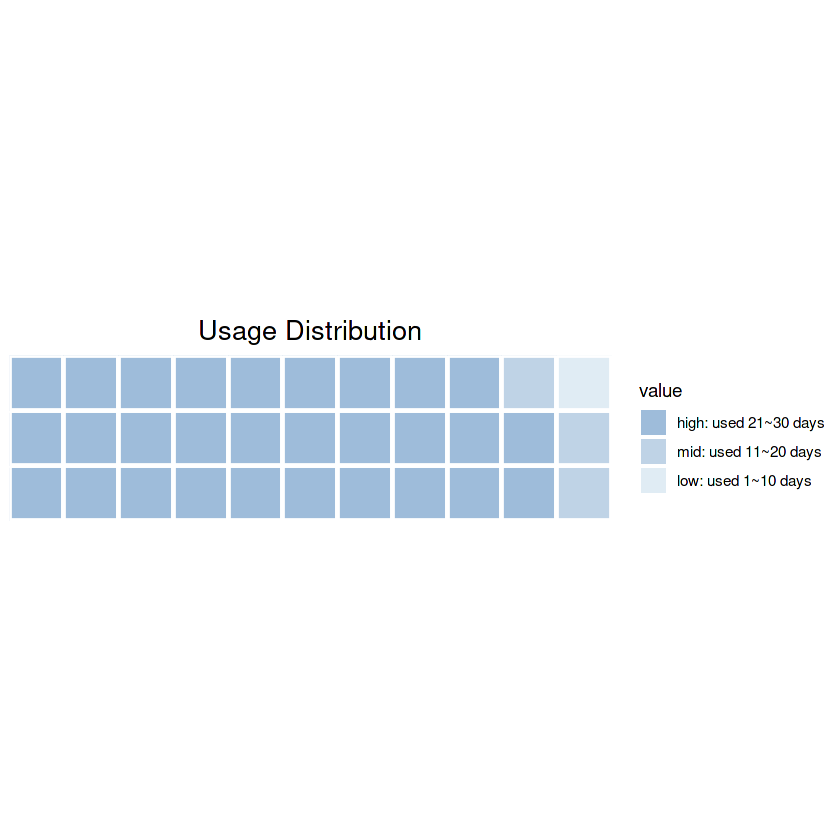

In [29]:
days_usage_waffle=c("high: used 21~30 days" =29,"mid: used 11~20 days"= 3, "low: used 1~10 days"=1)

waffle(days_usage_waffle, row=3, size=1, legend_pos='right')+
  labs(title= "Usage Distribution")+
  scale_fill_manual(values=c("#9EBCDA","#BFD3E6","#E0ECF4"))+
  theme(panel.background= element_blank(),
        plot.title= element_text(hjust= 0.5,vjust= 1, size=16))

Most of users wear the tracker more than 21 days during the period of a month. As we have observed, not all users wear it 24 hours every day. 
Let's see if there is some trend in this time frame.

Group hourly step by date:

In [30]:
h_step_trend<-(h_step) %>%
  group_by(date) %>%
  summarise(average_hr= n()/33)

head(h_step_trend) #This is the average hours users keep the tracker on.

date,average_hr
<date>,<dbl>
2016-04-12,24.00000
2016-04-13,24.00000
2016-04-14,24.00000
2016-04-15,23.75758
2016-04-16,23.27273
2016-04-17,23.27273


A line chart shows how users wear the tracker over time:

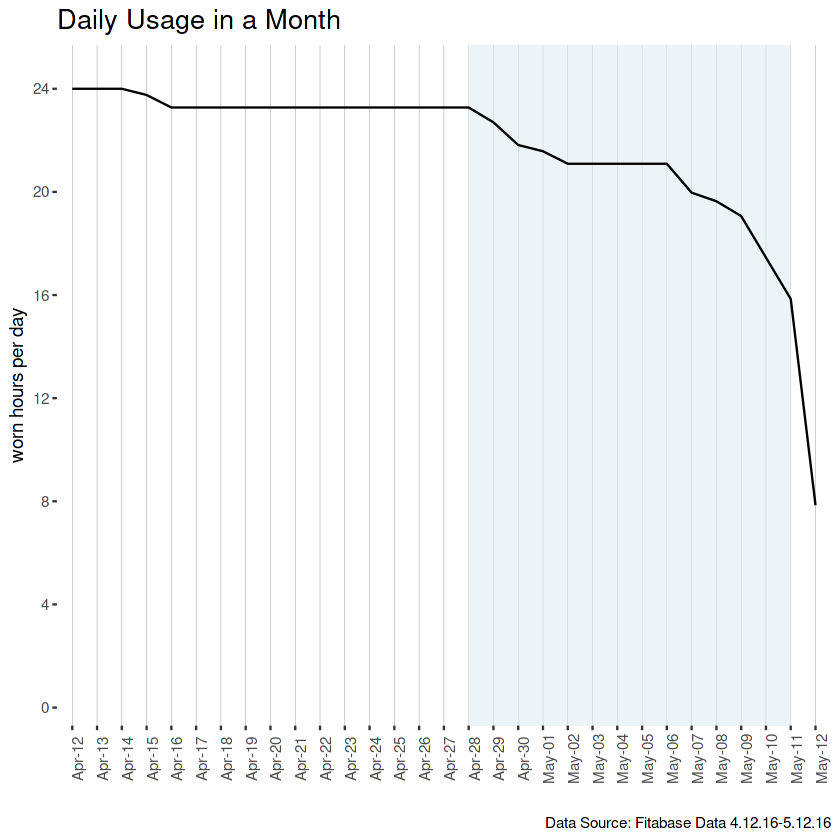

In [31]:
ggplot(h_step_trend, aes(x=date,y=average_hr))+
  scale_x_date(breaks= date_breaks("1 day"), 
               labels= date_format("%b-%d"), 
               limits=(c(min(h_step_trend$date),
                max(h_step_trend$date))),
               expand=c(.02,.02))+
  scale_y_continuous(limits=c(0,25),
                     breaks= seq(0,max(h_step_trend$average_hr),by= 4), 
                     expand= c(0,.7))+
  labs(title="Daily Usage in a Month", 
       x=" ", y="worn hours per day",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette="BuPu")+ 
  annotate("rect", xmin= as.Date("2016-04-28"), 
           xmax= as.Date("2016-05-11"),
           ymin= -Inf, ymax = Inf, 
           fill= "#E0ECF4", alpha=.6)+ 
theme(axis.text.x= element_text(angle = 90), 
        plot.title= element_text(size=16),
        panel.grid.major.x=element_line(colour="grey60",
                                        linetype="solid",size=0.1),
        panel.background= element_blank())+geom_line()

This descending line indicates that users wear the tracker full day at first, maintained a average wearing time of 23 hours a day, and then gradually decrease after 2 weeks (April 28th).

# <span style="color:#007BA7"> 6. Act - Recommendations </span> <a class="anchor" id="act"></a>

Let’s review the key findings first: 

- Users take 7,638 steps per day on average, lower than the daily 10,000 steps recommended by CDC. Users spend 70% of the time being seated or inactive per day. 

- A correlation can be identified between daily steps and calories, while there is no correlation between steps taken and amount of time users sleep per day. 

- The *lightly active* type has the longest sleep, while the *very active* type has the least amount of sleep. 

- Users are most active during 11am-1pm on Saturday, and 5-6pm on Wednesday. 

- The average time that users keep the tracker on gradually decreases after 2 weeks (April 28th).  

Based on the findings, Recommendations are as below: 

1. The App could recommend daily steps targets based on the user’s profile, lifestyle, and personal goals, and send reminders when the user is behind the targets. Features such as mini games, or wellness trivia, may help creating a sense of reward and thus increase retention rate. 
The App could send alerts to encourage activity if user remain seated or inactive longer than a certain period of time. This could be useful for users who work from home. 

2. [Studies](https://www.countyhealthrankings.org/take-action-to-improve-health/what-works-for-health/strategies/community-based-social-support-for-physical-activity) has shown that social support interventions increase physical activity among adults. The App could enhance social networking features such as in-app chats, or team goal setting among users to promote exercise habits. 

3. For users who specifically seek sleep improvement, The App could recommend light activities and alert the users if activity level has gone too intense based on their profile. Features to assist meditation may be useful to such users. 

4. It is worth further looking into why wear time decreases over a period of time. For Bellabeat devices,features such as water-proof, minimalist design, long battery life, or comfort for long wear could help encourage users keep it on all day.<br /><br /><br />

### <span style="color:#007BA7"> Thank you for reading my first case study in R! Please comment and upvote if you find it useful.<br /><br /><br /><br /></span>